In [1]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 

Wall time: 0 ns


In [2]:
%%time
#Загружаем файл с данными
data=pd.read_excel('data/26.4 Когортный анализ.xlsx')

Wall time: 49.7 s


In [3]:
%%time
#Посмотрим на загруженные данные
data.head()

Wall time: 0 ns


,user_id,date,price
0,A0005,2020-03-25,50
1,A0005,2020-03-25,40
2,A0005,2020-03-26,70
3,A0005,2020-03-27,20
4,A0005,2020-03-29,50


In [4]:
%%time
#Просмотрим на типы данных, наличие пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704840 entries, 0 to 704839
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   user_id  704840 non-null  object        
 1   date     704840 non-null  datetime64[ns]
 2   price    704840 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 16.1+ MB
Wall time: 46.6 ms


***В результате мы видим, что все колонки содержат по 704840 строк. В данных пропусков нет.***

In [5]:
%%time
#Создадим функцию, которая будет добавлять в новый столбец год и месяц от date
def get_month(x):
    return dt.datetime(x.year,x.month,1)

Wall time: 0 ns


In [6]:
%%time
#Вызовим функцию и создадим новый столбик
data['month_year']=data['date'].apply(get_month)

Wall time: 4.04 s


In [7]:
%%time
# посмотрим на получившиеся данные
data.head()

Wall time: 0 ns


,user_id,date,price,month_year
0,A0005,2020-03-25,50,2020-03-01
1,A0005,2020-03-25,40,2020-03-01
2,A0005,2020-03-26,70,2020-03-01
3,A0005,2020-03-27,20,2020-03-01
4,A0005,2020-03-29,50,2020-03-01


In [8]:
%%time
#Найдем первую дату заказа по каждому клиенту.
data['cohortMonth']=data.groupby('user_id')['month_year'].transform('min')

Wall time: 73 ms


In [9]:
%%time
#Посмотрим на получившийся результат
data.head(50)

Wall time: 0 ns


,user_id,date,price,month_year,cohortMonth
0,A0005,2020-03-25,50,2020-03-01,2020-03-01
1,A0005,2020-03-25,40,2020-03-01,2020-03-01
2,A0005,2020-03-26,70,2020-03-01,2020-03-01
3,A0005,2020-03-27,20,2020-03-01,2020-03-01
4,A0005,2020-03-29,50,2020-03-01,2020-03-01
5,A0005,2020-03-31,50,2020-03-01,2020-03-01
6,A0005,2020-03-31,40,2020-03-01,2020-03-01
7,A0005,2020-04-01,100,2020-04-01,2020-03-01
8,A0005,2020-04-02,40,2020-04-01,2020-03-01
9,A0005,2020-04-04,70,2020-04-01,2020-03-01


In [10]:
%%time
#Создадим еще одну функцию для разделения даты на год, месяц, день
def get_date(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day

Wall time: 0 ns


In [11]:
%%time
#Вызовим функцию 2 раза и результат ее работы положим в 2 переменные date_year, date_month при первом запуске и cohort_year, cohort_month при втором запуске. Получим год и месяц транзакции и год и месяц первого заказа для каждой строки данных
date_year,date_month,_=get_date(data,'date')
cohort_year,cohort_month,_=get_date(data,'cohortMonth')

Wall time: 342 ms


In [12]:
%%time
#Определим дельту между годом транзакции и годом первого заказа для каждой строки данных
year_diff=date_year-cohort_year

Wall time: 3 ms


In [13]:
%%time
#Определим дельту между месяцем транзакции и месяцем первого заказа для каждой строки данных
month_diff=date_month-cohort_month

Wall time: 2 ms


In [14]:
%%time
#В новый столбец cohort_index положим результат сложения дельт. Нулевые значения нам не нужны добавим +1 к сумме двух переменных.
data['cohort_index']=year_diff*12+month_diff+1

Wall time: 9 ms


In [46]:
%%time
#Посмотрим на получившийся результат
data.head()

Wall time: 0 ns


,user_id,date,price,month_year,cohortMonth,cohort_index
0,A0005,2020-03-25,50,2020-03-01,2020-03-01,1
1,A0005,2020-03-25,40,2020-03-01,2020-03-01,1
2,A0005,2020-03-26,70,2020-03-01,2020-03-01,1
3,A0005,2020-03-27,20,2020-03-01,2020-03-01,1
4,A0005,2020-03-29,50,2020-03-01,2020-03-01,1


In [47]:
%%time
#Посмотрим на уникальные значения в поле 'cohort_index'
print(data['cohort_index'].unique())

[ 1  2  3  4  5  6  7  8 12 10  9 11 13 14]
Wall time: 12 ms


In [48]:
%%time
data1=data.pivot_table(index='cohortMonth',
                      columns='cohort_index',
                      values='user_id',
                      aggfunc=len)
data2=data.pivot_table(index='cohortMonth',
                       columns='cohort_index',
                       values='price',
                       aggfunc=sum)
data3=data.pivot_table(index='cohortMonth',
                       columns='cohort_index',
                       values='user_id',
                       aggfunc=pd.Series.nunique)

Wall time: 417 ms


In [49]:
data1

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,9994.0,8175.0,7099.0,6637.0,6171.0,5127.0,4657.0,4278.0,4110.0,4240.0,3831.0,3791.0,3632.0,761.0
2020-02-01,8463.0,8013.0,5565.0,5593.0,4952.0,4184.0,3293.0,2876.0,2633.0,2172.0,1930.0,1595.0,309.0,NaN
2020-03-01,13210.0,9779.0,8148.0,7837.0,7410.0,6000.0,5634.0,5009.0,4595.0,4604.0,4414.0,899.0,NaN,NaN
2020-04-01,10123.0,8725.0,6272.0,6019.0,5769.0,4106.0,3699.0,3356.0,3358.0,3158.0,605.0,NaN,NaN,NaN
2020-05-01,14982.0,10806.0,8616.0,8336.0,7728.0,6609.0,5956.0,5811.0,5598.0,1137.0,NaN,NaN,NaN,NaN
2020-06-01,11304.0,9783.0,6793.0,6603.0,6294.0,5182.0,4710.0,4241.0,808.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,17007.0,11428.0,8432.0,8273.0,7204.0,6673.0,6218.0,1224.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,13458.0,10518.0,7241.0,7070.0,6935.0,5753.0,1038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,17781.0,12152.0,8846.0,8656.0,7829.0,1493.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
data2

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,662180.0,642990.0,608410.0,565650.0,547080.0,483840.0,455490.0,412040.0,407790.0,428040.0,382000.0,371740.0,360570.0,79310.0
2020-02-01,536310.0,594210.0,445590.0,450500.0,409640.0,366150.0,300350.0,278920.0,251840.0,212570.0,194800.0,156240.0,31080.0,NaN
2020-03-01,873000.0,797300.0,680220.0,666890.0,646610.0,546210.0,542030.0,486430.0,461720.0,465630.0,447040.0,90390.0,NaN,NaN
2020-04-01,648770.0,667480.0,526090.0,503450.0,482350.0,378620.0,354250.0,332740.0,329710.0,314460.0,61750.0,NaN,NaN,NaN
2020-05-01,992030.0,870090.0,737430.0,740850.0,699940.0,633220.0,584100.0,572410.0,568870.0,115380.0,NaN,NaN,NaN,NaN
2020-06-01,718980.0,759810.0,563430.0,559150.0,545300.0,472750.0,453890.0,411240.0,78310.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,1106840.0,913300.0,739440.0,735260.0,661290.0,634590.0,604380.0,124890.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,844520.0,800350.0,607090.0,586730.0,603010.0,517030.0,94600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1164460.0,979070.0,784700.0,778600.0,710410.0,140880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data3

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1210.0,455.0,264.0,247.0,242.0,207.0,185.0,172.0,165.0,171.0,164.0,159.0,162.0,149.0
2020-02-01,1111.0,440.0,222.0,202.0,201.0,171.0,133.0,123.0,113.0,90.0,94.0,76.0,62.0,NaN
2020-03-01,1545.0,527.0,306.0,290.0,286.0,250.0,223.0,208.0,186.0,187.0,182.0,175.0,NaN,NaN
2020-04-01,1333.0,515.0,238.0,219.0,228.0,186.0,144.0,143.0,136.0,125.0,111.0,NaN,NaN,NaN
2020-05-01,1738.0,581.0,313.0,301.0,302.0,260.0,240.0,235.0,219.0,206.0,NaN,NaN,NaN,NaN
2020-06-01,1480.0,558.0,265.0,247.0,249.0,216.0,186.0,174.0,153.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,1995.0,649.0,332.0,312.0,293.0,256.0,243.0,224.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1744.0,643.0,285.0,265.0,263.0,227.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,2081.0,701.0,336.0,312.0,303.0,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
%%time
#Сделаем срез по первому столбу фрейма data1 (сводная по user_id). Это первый заказ для каждого пользователя
first_column=data1.iloc[:,0]
first_column2=data2.iloc[:,0]
first_column3=data3.iloc[:,0]
# Посмотрим на результат
first_column

Wall time: 0 ns


cohortMonth
2020-01-01     9994.0
2020-02-01     8463.0
2020-03-01    13210.0
2020-04-01    10123.0
2020-05-01    14982.0
2020-06-01    11304.0
2020-07-01    17007.0
2020-08-01    13458.0
2020-09-01    17781.0
2020-10-01    15039.0
2020-11-01    18887.0
2020-12-01    16582.0
2021-01-01    20532.0
2021-02-01     1317.0
Name: 1, dtype: float64

In [53]:
%%time
# Разделим блок данных по серии для каждой Матрицы и круглим до 2 знаков после запятой. Получим проценты
retention=data1.div(first_column,axis=0).round(2)
retention2=data2.div(first_column2,axis=0).round(2)
retention3=data3.div(first_column3,axis=0).round(2)
# Матрица количества покупателей
retention

Wall time: 19 ms


cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.82,0.71,0.66,0.62,0.51,0.47,0.43,0.41,0.42,0.38,0.38,0.36,0.08
2020-02-01,1.0,0.95,0.66,0.66,0.59,0.49,0.39,0.34,0.31,0.26,0.23,0.19,0.04,NaN
2020-03-01,1.0,0.74,0.62,0.59,0.56,0.45,0.43,0.38,0.35,0.35,0.33,0.07,NaN,NaN
2020-04-01,1.0,0.86,0.62,0.59,0.57,0.41,0.37,0.33,0.33,0.31,0.06,NaN,NaN,NaN
2020-05-01,1.0,0.72,0.58,0.56,0.52,0.44,0.40,0.39,0.37,0.08,NaN,NaN,NaN,NaN
2020-06-01,1.0,0.87,0.60,0.58,0.56,0.46,0.42,0.38,0.07,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.67,0.50,0.49,0.42,0.39,0.37,0.07,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.78,0.54,0.53,0.52,0.43,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.68,0.50,0.49,0.44,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Матрица сумм их покупок
retention2

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.97,0.92,0.85,0.83,0.73,0.69,0.62,0.62,0.65,0.58,0.56,0.54,0.12
2020-02-01,1.0,1.11,0.83,0.84,0.76,0.68,0.56,0.52,0.47,0.40,0.36,0.29,0.06,NaN
2020-03-01,1.0,0.91,0.78,0.76,0.74,0.63,0.62,0.56,0.53,0.53,0.51,0.10,NaN,NaN
2020-04-01,1.0,1.03,0.81,0.78,0.74,0.58,0.55,0.51,0.51,0.48,0.10,NaN,NaN,NaN
2020-05-01,1.0,0.88,0.74,0.75,0.71,0.64,0.59,0.58,0.57,0.12,NaN,NaN,NaN,NaN
2020-06-01,1.0,1.06,0.78,0.78,0.76,0.66,0.63,0.57,0.11,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.83,0.67,0.66,0.60,0.57,0.55,0.11,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.95,0.72,0.69,0.71,0.61,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.84,0.67,0.67,0.61,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
retention3

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.38,0.22,0.20,0.20,0.17,0.15,0.14,0.14,0.14,0.14,0.13,0.13,0.12
2020-02-01,1.0,0.40,0.20,0.18,0.18,0.15,0.12,0.11,0.10,0.08,0.08,0.07,0.06,NaN
2020-03-01,1.0,0.34,0.20,0.19,0.19,0.16,0.14,0.13,0.12,0.12,0.12,0.11,NaN,NaN
2020-04-01,1.0,0.39,0.18,0.16,0.17,0.14,0.11,0.11,0.10,0.09,0.08,NaN,NaN,NaN
2020-05-01,1.0,0.33,0.18,0.17,0.17,0.15,0.14,0.14,0.13,0.12,NaN,NaN,NaN,NaN
2020-06-01,1.0,0.38,0.18,0.17,0.17,0.15,0.13,0.12,0.10,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.33,0.17,0.16,0.15,0.13,0.12,0.11,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.37,0.16,0.15,0.15,0.13,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.34,0.16,0.15,0.15,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


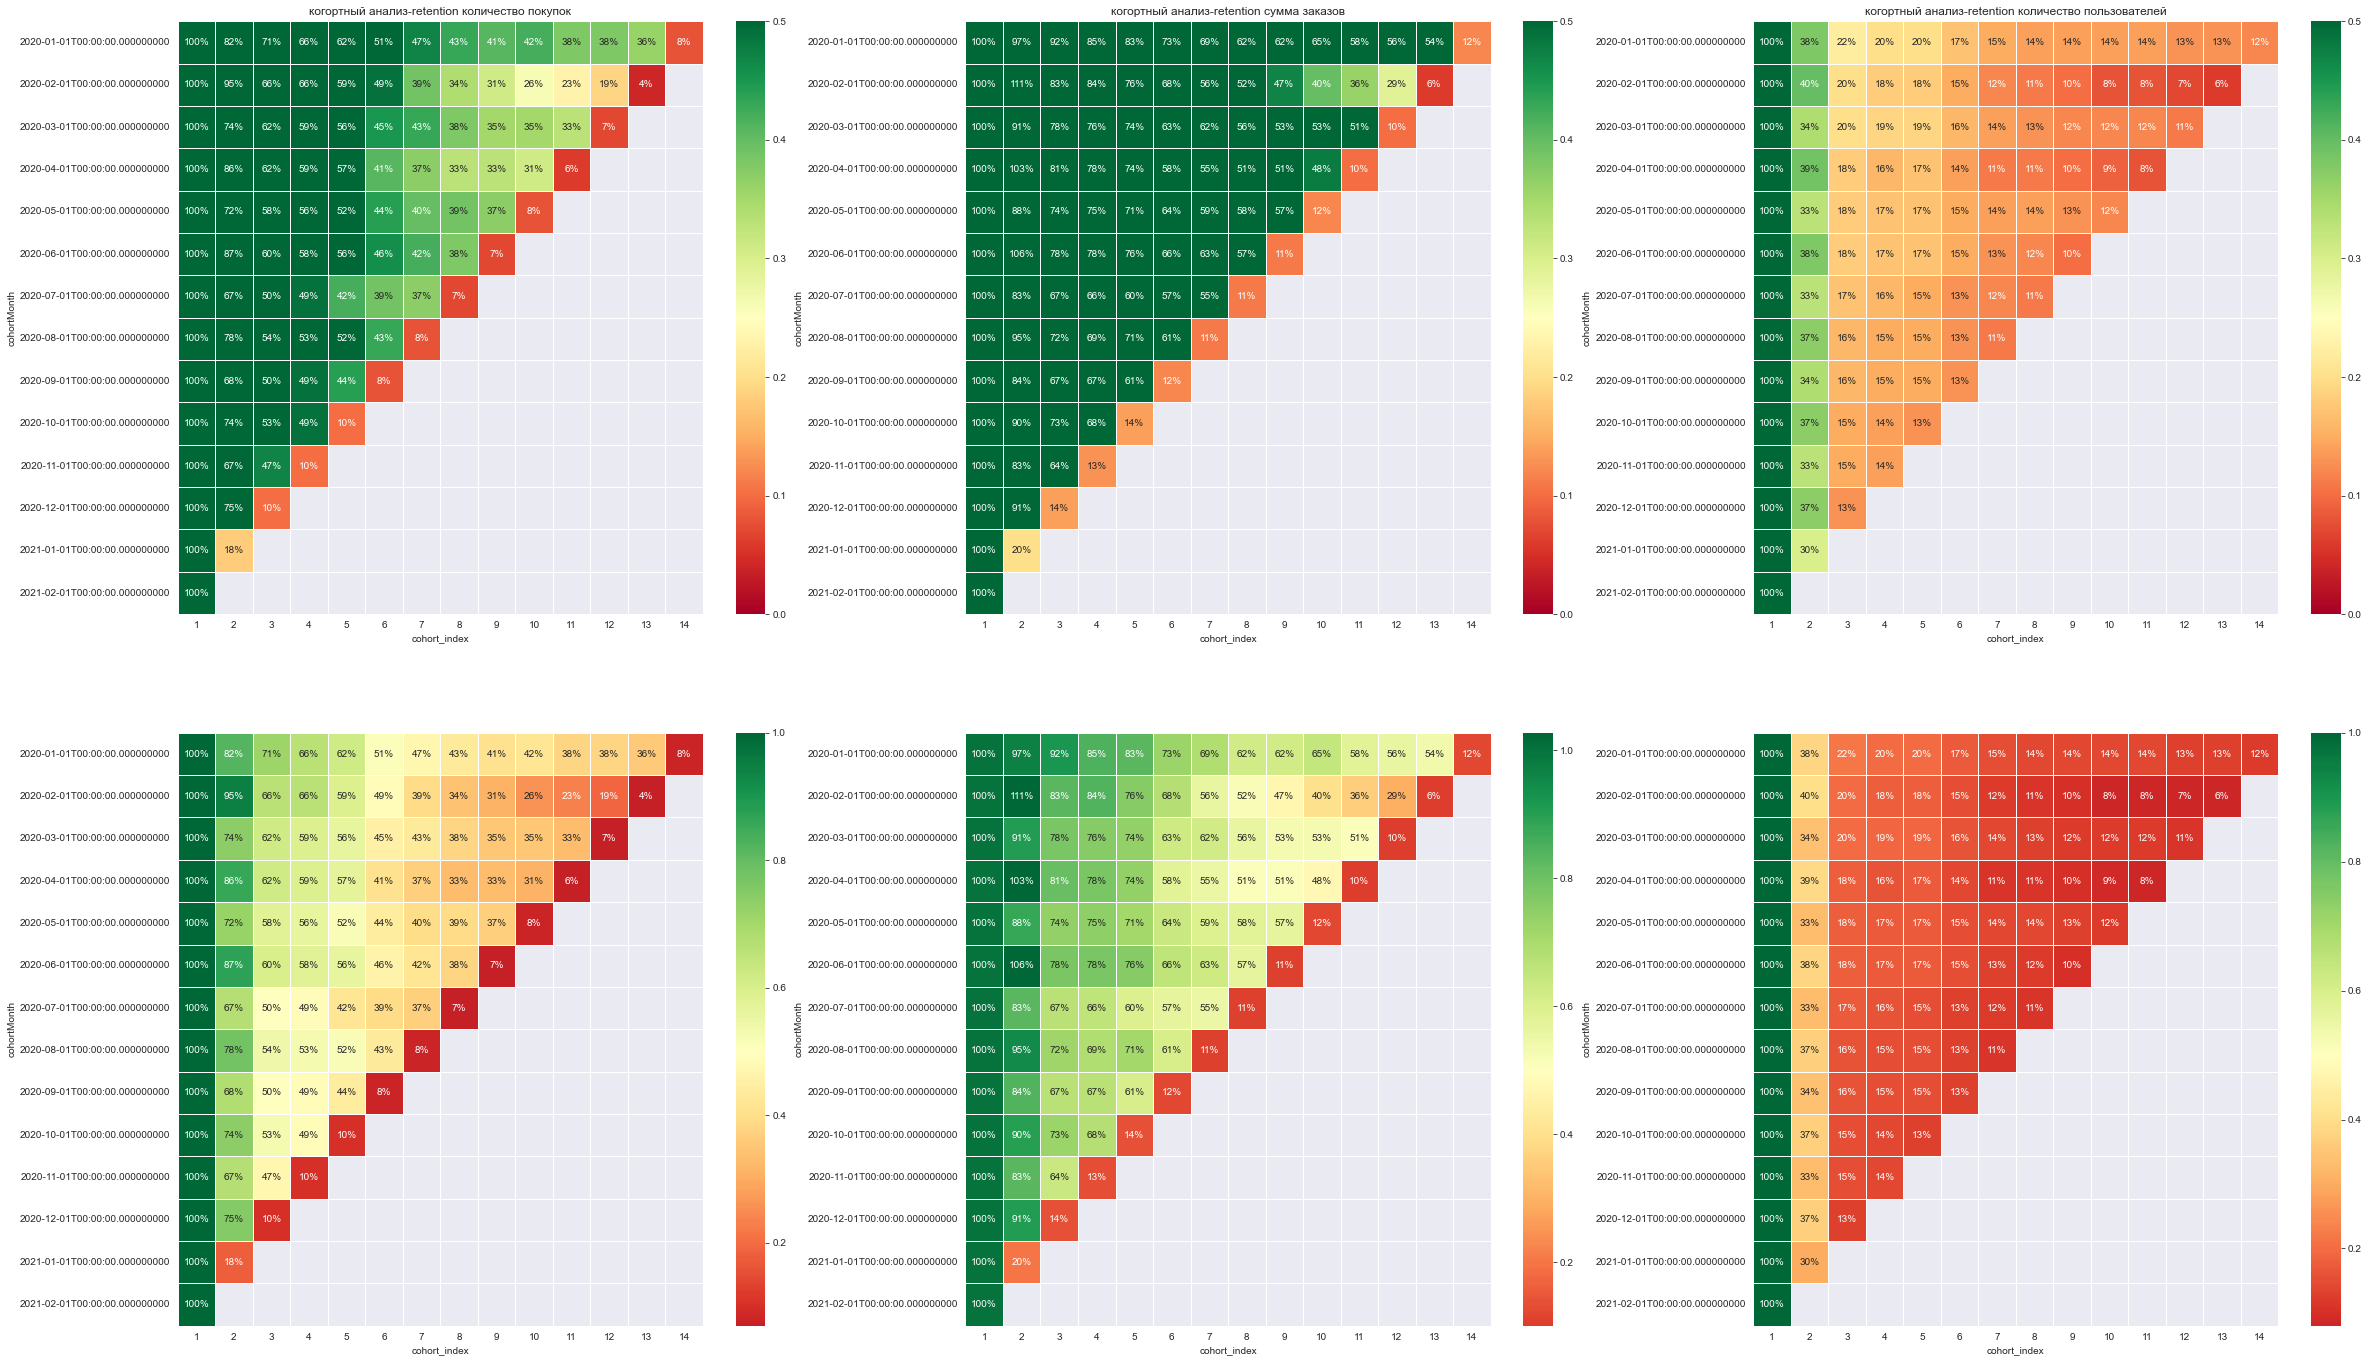

In [56]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(40, 24))
ax1.set_title('когортный анализ-retention количество покупок')
ax2.set_title('когортный анализ-retention сумма заказов')
ax3.set_title('когортный анализ-retention количество пользователей')
sns.heatmap(data=retention,
            annot=True,
            fmt='.0%',
            # robust=True,
            # center=.5,
            vmin=0.0,
            vmax=0.5,
            linewidths=.8,
            cmap="RdYlGn",
            ax = ax1)
sns.heatmap(data=retention2,
            annot=True,
            fmt='.0%',
            # robust=True,
            # center=.5,
            vmin=0.0,
            vmax=0.5,
            linewidths=.8,
            cmap="RdYlGn",
            ax = ax2)
sns.heatmap(data=retention3,
            annot=True,
            fmt='.0%',
            # robust=True,
            # center=.5,
            vmin=0.0,
            vmax=0.5,
            linewidths=.8,
            cmap="RdYlGn",
            ax = ax3)
sns.heatmap(data=retention,
            annot=True,
            fmt='.0%',
            robust=True,
            center=.5,
            # vmin=0.0,
            # vmax=0.5,
            linewidths=.8,
            cmap="RdYlGn",
            ax = ax4)
sns.heatmap(data=retention2,
            annot=True,
            fmt='.0%',
            robust=True,
            center=.5,
            # vmin=0.0,
            # vmax=0.5,
            linewidths=.8,
            cmap="RdYlGn",
            ax = ax5)
sns.heatmap(data=retention3,
            annot=True,
            fmt='.0%',
            robust=True,
            center=.5,
            # vmin=0.0,
            # vmax=0.5,
            linewidths=.8,
            cmap="RdYlGn",
            ax = ax6)
plt.show()

**Проанализируйте получившиеся графики и опишите результат.**
**Что необычного вы заметили?**
Резкое снижение количества уникальных пользователей на 2-м месяце.
У каждой четной когорты (месяц) сумма и общее количество покупок во 2-м месяце выше, чем у не четной.
Начиная с 5 месяца значительное снижение количества покупок, но по сумме покупок снижение не фиксируется, так же и количество уникальных пользователей равномерно снижается, без пиков.

**Есть ли выбивающиеся когорты?**
По сумме покупок 2, 4, 6 когорты превысили сумму первой покупки.

**У каких когорт лучшая возвращаемость клиентов, а у каких худшая?**
У четных когорт возвращаемость клиентов лучше чем у не четных
У когорт 2, 4, 6 возвращаемость клиентов лучше во 2-м месяце, но в 3-м месяце возвращаемость выравнивается.

**Что стоило бы ещё исследовать внимательнее на других данных?**
Причины резкого сокращения уникальных клиентов. Рекламу, по которой пришли данные покупатели, товар который они приобрели – возможно в рекламе обещали больше чем получили те покупатели которые не вернулись после первой покупки, качество сервиса и товара.
Причины увеличения сумм покупок 2, 4, 6 когорт во 2-м месяце, какой товар был приобретён этими покупателями, по какой цене.
Какие акции проводились для удержания новых клиентов и почему эти акции перестали работать начиная с 3-го месяца.